In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime as dt

In [2]:
pth = ('C:/Users/theoc/Documents/NSS/Python/projects/socrata_api-theo-carr/notebooks/cookedData/afternoon_run.csv')
afternoon = pd.read_csv(pth)

##### **Bring in lunch run**

In [3]:
pth = ('C:/Users/theoc/Documents/NSS/Python/projects/socrata_api-theo-carr/notebooks/cookedData/lunch_run.csv')
lunch = pd.read_csv(pth)

# Concat Tables

In [4]:
fireStats = pd.concat([afternoon,lunch])
fireStats

,zip,num_stations,num_incidents,incidents_to_stations_ratio,timestamp
0,37013,3,4.0,1.333333,Nov-13hr-16min
1,37072,2,2.0,1.000000,Nov-13hr-16min
2,37076,1,0.0,0.000000,Nov-13hr-16min
3,37080,1,0.0,0.000000,Nov-13hr-16min
4,37115,2,1.0,0.500000,Nov-13hr-16min
...,...,...,...,...,...
171,37215,1,0.0,0.000000,Nov-13hr-04min
172,37216,1,0.0,0.000000,Nov-13hr-04min
173,37217,1,2.0,2.000000,Nov-13hr-04min
174,37218,1,1.0,1.000000,Nov-13hr-04min


# **Clean Table** 

In [5]:
#concat 
fireStats = pd.concat([afternoon,lunch])
#rename columns
fireStats = fireStats.rename(columns = {'incidents_to_stations_ratio':'stress_ratio',
                                        'num_incidents':'incidents'})
#clean date string
fireStats.timestamp = fireStats.timestamp.str.replace('hr','')
fireStats.timestamp = fireStats.timestamp.str.replace('min','')
fireStats.timestamp = fireStats.timestamp + '-2022'
#to datetime
fireStats.timestamp = pd.to_datetime(fireStats.timestamp, format = "%b-%H-%M-%Y")
#make zip code a string
fireStats.zip = fireStats.zip.astype('str')
#create hour column
fireStats['hour'] = fireStats.timestamp.dt.hour

In [6]:
fireStats

,zip,num_stations,incidents,stress_ratio,timestamp,hour
0,37013,3,4.0,1.333333,2022-11-01 13:16:00,13
1,37072,2,2.0,1.000000,2022-11-01 13:16:00,13
2,37076,1,0.0,0.000000,2022-11-01 13:16:00,13
3,37080,1,0.0,0.000000,2022-11-01 13:16:00,13
4,37115,2,1.0,0.500000,2022-11-01 13:16:00,13
...,...,...,...,...,...,...
171,37215,1,0.0,0.000000,2022-11-01 13:04:00,13
172,37216,1,0.0,0.000000,2022-11-01 13:04:00,13
173,37217,1,2.0,2.000000,2022-11-01 13:04:00,13
174,37218,1,1.0,1.000000,2022-11-01 13:04:00,13


### Scatter Plot

findfont: Font family ['Comic Sans'] not found. Falling back to DejaVu Sans.


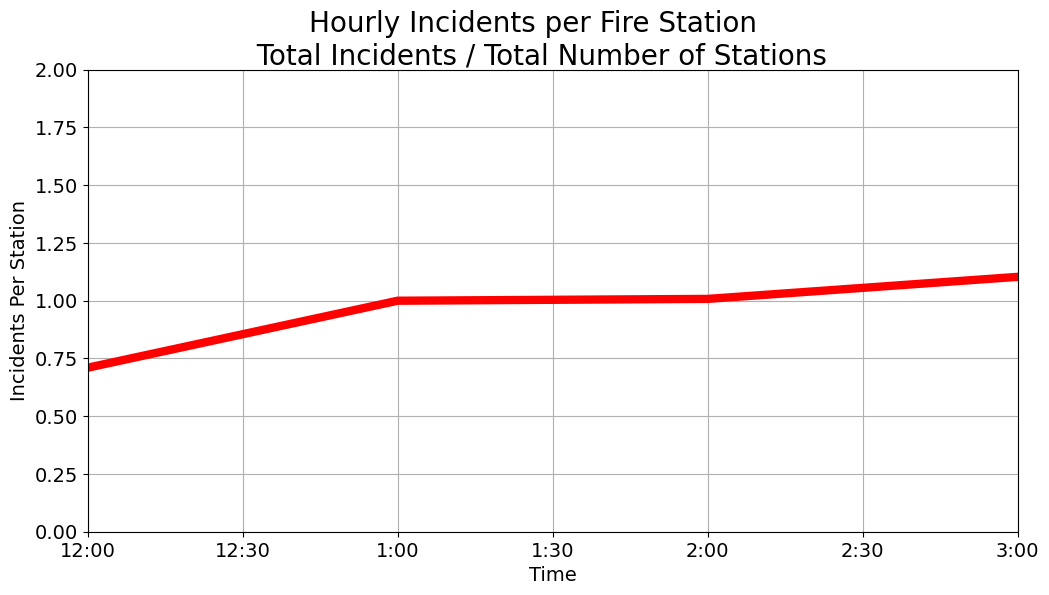

In [7]:
hourgroup = fireStats[['zip','incidents', 'stress_ratio', 'hour']].groupby(['hour']).mean()
#x axis labels
labels = ['12:00','12:30','1:00','1:30','2:00','2:30','3:00']
ticks = [12,12.5,13,13.5,14,14.5,15]
#draw main plot
hourgroup.stress_ratio.plot(figsize = (12,6), lw = 6, color = 'RED')

#format x axis
plt.xticks(ticks = ticks, labels = labels, fontsize=14)
plt.xlim([12,15])
#format y axis
plt.yticks(fontsize=14)
plt.ylim([0,2])

#labels
plt.ylabel('Incidents Per Station',fontsize=14)
plt.xlabel('Time', fontsize = 14)

#title
plt.suptitle('Hourly Incidents per Fire Station \n Total Incidents / Total Number of Stations',
            fontsize = 20,fontfamily='Comic Sans')
#other format
plt.grid()


None

In [8]:
# group by zipcode 
zipgroup = fireStats.groupby('zip')

In [9]:
zipRatio = zipgroup['stress_ratio'].describe()
zipStations = zipgroup['num_stations'].describe()

In [10]:
zipRatio = zipRatio.rename_axis('zip').reset_index()
zipStations = zipStations.rename_axis('zip').reset_index()

Text(0, 0.5, '')

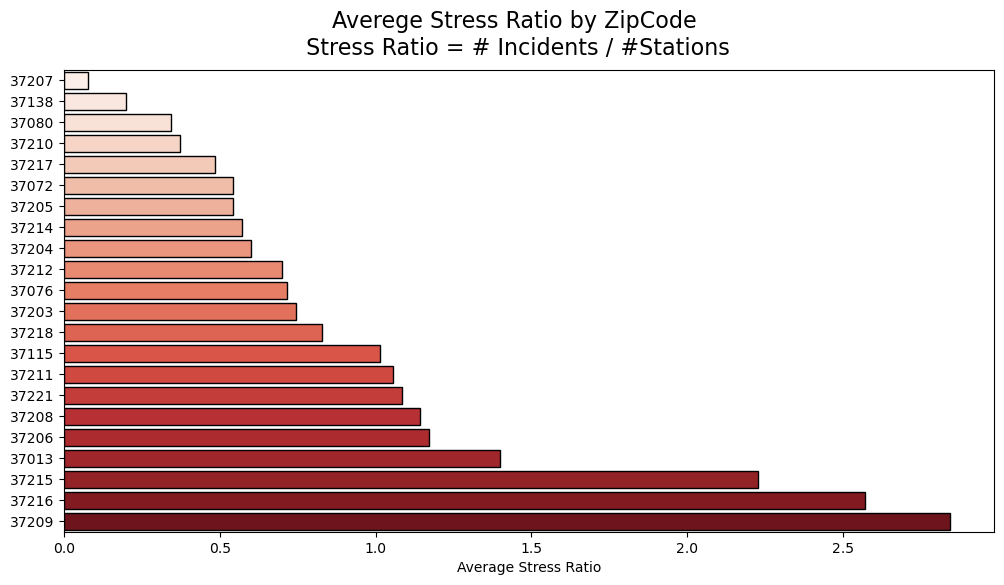

In [11]:
fig,ax = plt.subplots(figsize = (12,6))
sns.barplot(data = zipRatio.sort_values(by = 'mean', ascending = True),
            x = 'mean',
            y = 'zip',
            palette = 'Reds',
            edgecolor = 'black')
#title 
plt.suptitle('Averege Stress Ratio by ZipCode' + 
             '\n Stress Ratio = # Incidents / #Stations',
             fontsize = 16)
#x axis
plt.xlabel('Average Stress Ratio')
#y axis
plt.ylabel('')

In [12]:
#############################################
# MAKE TIMESTAMP COLUMN TIME OBJECT WITH DT.TIME
fireStats.timestamp = fireStats.timestamp.dt.time

In [13]:
#Drill down on 37209
myzip = fireStats.loc[fireStats.zip == '37209']
notmyzip = fireStats.loc[fireStats.zip != '37209']
notmyzip.stress_ratio.mean()

0.8757369614512471

In [38]:
fireStats.loc[fireStats.incidents == fireStats.incidents.max()]

,zip,num_stations,incidents,stress_ratio,timestamp,hour
586,37211,4,22.0,5.5,15:35:00,15
